In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import csv

In [21]:
RESULTDIR = "/home/daniel/.vn_chk_altitude/result/"
ECART = 500
NB_COMMUNES = 20000

paths = Path(RESULTDIR).glob('**/*.csv')
f_num = 0
gros_ecart = pd.DataFrame()
hors_zone = pd.DataFrame()
sans_alti = pd.DataFrame()
nb_obs = 0
for path in paths:
    f_num += 1
    if f_num > NB_COMMUNES:
        break
    df = pd.read_csv(str(path))
    nb_obs += len(df)
    gros_ecart = gros_ecart.append(df[(df["ecart_vertical"] < -ECART) | (df["ecart_vertical"] > ECART)])
    hors_zone = hors_zone.append(df[df["altitude_ign"] == -1])
    sans_alti = sans_alti.append(df[df["altitude"] < 10])

In [24]:
gros_ecart.to_csv(RESULTDIR + "gros_ecart.csv")
hors_zone.to_csv(RESULTDIR + "hors_zone.csv")
sans_alti.to_csv(RESULTDIR + "sans_alti.csv")

In [3]:
gros_ecart.head()

Unnamed: 0   site id_universal  date_year  altitude  coord_x_local  \
75           75  vnauv     7_209065       2002       999   663947.52034   
874         874  vnauv     7_435214       1995       999   663947.52034   
875         875  vnauv     7_364610       1985       999   663947.52034   
876         876  vnauv     7_311325       1998       999   663947.52034   
877         877  vnauv     7_311805       1998       999   663947.52034   

     coord_y_local         name  id_canton  altitude_ign  pente_ign  \
75    6.518884e+06  Verneugheol         64         711.5   7.557697   
874   6.518884e+06  Verneugheol         64         711.5   7.557697   
875   6.518884e+06  Verneugheol         64         711.5   7.557697   
876   6.518884e+06  Verneugheol         64         711.5   7.557697   
877   6.518884e+06  Verneugheol         64         711.5   7.557697   

     ecart_vertical  ecart_horizontal  
75            287.5            2875.0  
874           287.5            2875.0  
875           287.5            2875.0  
876           287.5            2875.0  
877           287.5            2875.0

In [15]:
sans_alti.head()

Unnamed: 0  site id_universal  date_year  altitude  coord_x_local  \
1254        1254  vn42    13_582872       2012         0   768959.22859   
1255        1255  vn42    13_582873       2012         0   768959.22859   
1256        1256  vn42    13_582874       2012         0   768959.22859   
1257        1257  vn42    13_582875       2012         0   768959.22859   
1258        1258  vn42    13_582876       2012         0   768959.22859   

      coord_y_local             name  id_canton  altitude_ign  pente_ign  \
1254   6.564498e+06  Pacaudière (La)         43    331.100006   1.274743   
1255   6.564498e+06  Pacaudière (La)         43    331.100006   1.274743   
1256   6.564498e+06  Pacaudière (La)         43    331.100006   1.274743   
1257   6.564498e+06  Pacaudière (La)         43    331.100006   1.274743   
1258   6.564498e+06  Pacaudière (La)         43    331.100006   1.274743   

      ecart_vertical  ecart_horizontal  
1254     -331.100006       3311.000061  
1255     -331.100006       3311.000061  
1256     -331.100006       3311.000061  
1257     -331.100006       3311.000061  
1258     -331.100006       3311.000061

In [16]:
print(len(gros_ecart), nb_obs, len(gros_ecart)/nb_obs*100)
print(len(hors_zone), nb_obs, len(hors_zone)/nb_obs*100)
print(len(sans_alti), nb_obs, len(sans_alti)/nb_obs*100)

1896 436581 0.434283672445663
2 436581 0.000458105139710615
8 436581 0.00183242055884246


In [5]:
gros_ecart["ecart_vertical"].describe()

count    4838.000000
mean      262.124750
std       462.007317
min     -2788.600098
25%      -101.270020
50%       216.190002
75%       491.880005
max      1736.369995
Name: ecart_vertical, dtype: float64

In [19]:
hors_zone["ecart_vertical"].describe()

count      2.000000
mean     741.000000
std      155.563492
min      631.000000
25%      686.000000
50%      741.000000
75%      796.000000
max      851.000000
Name: ecart_vertical, dtype: float64

In [20]:
sans_alti["ecart_vertical"].describe()

count      8.000000
mean    -366.873756
std       69.993565
min     -516.500000
25%     -356.297508
50%     -331.100006
75%     -331.100006
max     -331.100006
Name: ecart_vertical, dtype: float64

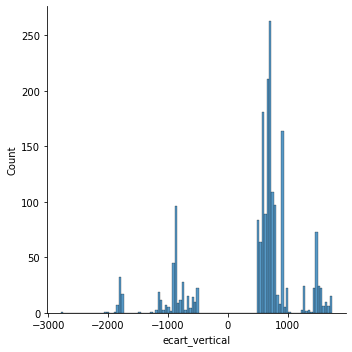

In [12]:
sns.displot(gros_ecart, x="ecart_vertical");

In [7]:
gros_annuel = gros_ecart[["date_year", "ecart_vertical"]]
gros_tendance = gros_annuel.groupby(["date_year"]).describe()["ecart_vertical"]
gros_tendance.head()

count         mean        std          min          25%  \
date_year                                                            
1963         1.0   901.350006        NaN   901.350006   901.350006   
1968         1.0   611.200012        NaN   611.200012   611.200012   
1971         1.0  1525.320007        NaN  1525.320007  1525.320007   
1972         1.0  1506.179993        NaN  1506.179993  1506.179993   
1973         2.0   722.200012  22.627417   706.200012   714.200012   

                   50%          75%          max  
date_year                                         
1963        901.350006   901.350006   901.350006  
1968        611.200012   611.200012   611.200012  
1971       1525.320007  1525.320007  1525.320007  
1972       1506.179993  1506.179993  1506.179993  
1973        722.200012   730.200012   738.200012

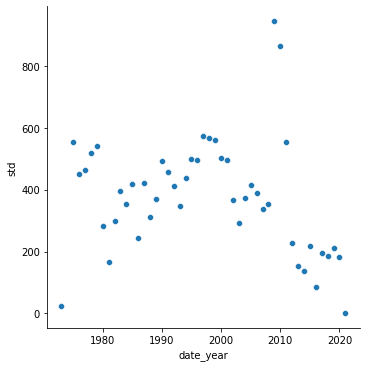

In [8]:
sns.relplot(x="date_year", y="std", data=gros_tendance);

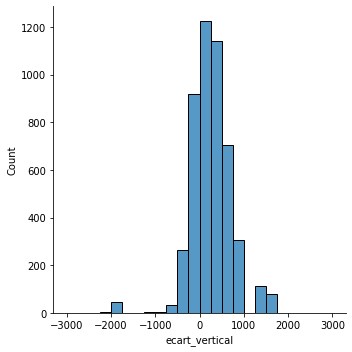

In [9]:
x = sns.displot(gros_ecart["ecart_vertical"], binwidth=250, binrange=(-3000,3000));

In [10]:
hist, bins = np.histogram(gros_ecart["ecart_vertical"], bins=int(6000/250), range=(-3000,3000))
print(bins)
print(hist)

[-3000. -2750. -2500. -2250. -2000. -1750. -1500. -1250. -1000.  -750.
  -500.  -250.     0.   250.   500.   750.  1000.  1250.  1500.  1750.
  2000.  2250.  2500.  2750.  3000.]
[   1    0    0    2   47    0    1    4    2   33  263  917 1225 1141
  704  304    0  113   81    0    0    0    0    0]


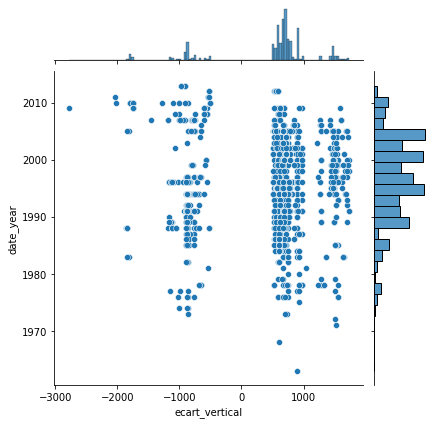

In [13]:
sns.jointplot(data=gros_ecart, x="ecart_vertical", y="date_year");

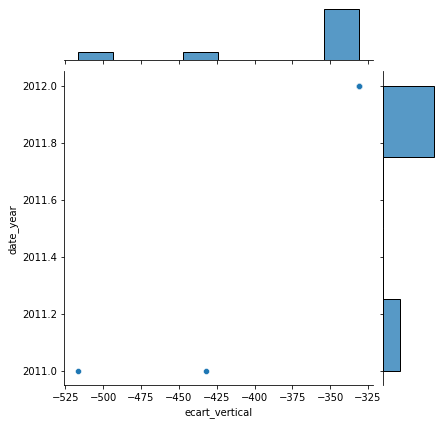

In [17]:
sns.jointplot(data=sans_alti, x="ecart_vertical", y="date_year");


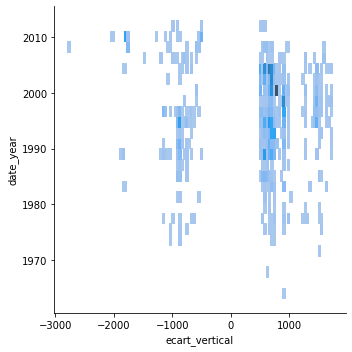

In [18]:
sns.displot(gros_ecart, x="ecart_vertical", y="date_year");